In [1]:
# !pip install gprofiler-official
# !pip install openpyxl

In [1]:
import pandas as pd
from gprofiler import GProfiler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Jeff's iCLIP output

data_syp_fly = pd.read_csv('datasets/Syp_fly.csv', index_col=0)
print(data_syp_fly)
list_syp_fly = list(data_syp_fly['gene_id'])
# list_syp_fly = ['chic', 'Zasp66', 'bt', 'cher', 'Bsg', 'Mlp84B', 'Mlc-c', 'cib', 'Tm1', 'Gbeta13F', 'chinmo', 'CG34417', 
#              'Cam', 'up', 'Msp300', 'wupA', 'Akap200', 'Mlc2', 'Rho1', 'Atx2', 'how', 'Moe', 'svr', 'CG43897', 'Mhc', 
#              'zip', 'ctp' 'sn', 'Pka-C1', 'ed', 'mys', 'pod1', 'Cdc42', 'Ggamma1', 'tral', 'Actn', 'Lam', 'Prm', 
#              'l(2)gl', 'Rab11', 'Tm2', 'hts', 'mask', 'Gel', 'Zasp52', 'sau', 'CG33521', 'capt', 'Mlp60A', 'sls', 'shi', 
#              'sktl', 'Src64B', 'coro', 'shot', 'tsr', 'tmod', 'beta-Spec', 'sqh', 'nuf', 'cpb', 'gish', 'Pka-R1', 'Rac1', 
#              'pico', 'Rack1', 'rhea', 'Mrtf', 'p120ctn', 'Mical', 'seq', 'spoon', 'Galphao', 'Dl', 'CG43658', 'Dg', 
#              'Mtl', 'CG32264', 'if', 'kel', 'Rac2', 'CG8726', 'N', 'polo', 'ena', 'jar', 'parvin', 'sick', 'bru1', 'tn', 
#              'Fim', 'Svil', 'Pak3', 'Mhcl', 'Pi3K68D', 'CG1674', 'sals', 'Fhos', 'Cortactin', 'RhoGAP92B', 'smog', 
#              'tal-1A', 'tal-2A', 'tal-3A', 'tal-AA', 'Arpc1', 'Arp2', 'Arf51F', 'pigs', 'dia', 'mew', 'WASp', 
#              'alpha-Spec', 'Frl', 'CG30389', 'zye', 'alpha-Cat', 'RhoGAP71E', 'cv-c', 'fwd', 'Slik', 'pnut', 'Arp3', 
#              'Btk29A', 'Crk', 'flr', 'gukh', 'flw', 'CLIP-190', 'Pkn', 'siz', 'jvl', 'Arfip', 'Lasp', 'conu', 'Abl', 
#              'zormin', 'Arpc5', 'Arpc2', 'CG42319', 'Gprk2', 'wash', 'feo', 'Nedd4', 'l(2)efl', 'CG10939', 'dco', 
#              'CG6891', 'Unc-115a', 'sti', 'RhoGAP68F', 'sns', 'Vav', 'cdi', 'Ehbp1', 'Myo31DF', 'Ack-like', 'SCAR', 
#              'kug', 'crb', 'tyn', 'cpa', 'osp', 'CG10915', 'Spn', 'mthl1', 'vib', 'Rok', 'moody', 'Khc', 'Rab35', 
#              'Arpc3A', 'Myo81F', 'psidin', 'CG31715', 'C3G', 'CG9426', 'cora', 'DAAM', 'spir', 'RhoGEF2', 'btsz', 'cta', 
#              'hep', 'ALiX', 'CanB2', 'Pten', 'Lst8', 'Cip4', 'Myo61F', 'Kank', 'Nup154', 'fog', 'step', 'Src42A', 'fz', 
#              'Vps4']

# read in data
data_syp_rat = pd.read_excel('datasets/Khudayberdiev_2020_Syp_iCLIP.xlsx', sheet_name='Suppl. Table 6', engine='openpyxl')
print(data_syp_rat.columns)
data_neur = pd.read_csv('datasets/Kugelgin_and_Chekulaeva_2020_21_neurite_transcriptomes.csv')
data_neur = data_neur.rename(columns={'Unnamed: 0': 'Ranking'})
print(data_neur.columns)

list_syp_rat = list(data_syp_rat['GeneID'])
list_neur = list(data_neur['gene_id']) # ENSG in mice

    gene_name      gene_id
1         Abl  FBgn0000017
2         Cam  FBgn0000253
3      Pka-C1  FBgn0000273
4        chic  FBgn0000308
5          Dl  FBgn0000463
..        ...          ...
193    Myo81F  FBgn0267431
194       vib  FBgn0267975
195      wupA  FBgn0283471
196       tyn  FBgn0284435
197      cv-c  FBgn0285955

[197 rows x 2 columns]
Index(['# Chromosome', 'Genomic peak start', 'Genomic peak end', 'RefSeq-NM',
       'GeneID', 'Gene Name', '# UTRs per gene',
       'DNA strand orientation (+ or -)', '# Significant Peaks',
       '# Unique reads within significant peaks'],
      dtype='object')
Index(['Ranking', 'gene_id', 'Gene name', 'description',
       'Datasets with neurite TPM > 10', 'Mean TPM in neurites',
       'Studies with neurite ribosome association', 'primary motor neurons B',
       'neuroblastoma line CAD', 'Ascl1 induced neurons B',
       'primary dorsal root ganglia', 'primary cortical neurons B',
       'primary cortical neurons C', 'primary motor neuron

In [4]:
# convert Jeff's iclip and syn rat genes to their orthologous genes in mouse
gp = GProfiler(return_dataframe=True)
syp_fly_to_mouse = gp.orth(organism='dmelanogaster', query=list_syp_fly, target='mmusculus')
print(syp_fly_to_mouse)
syp_fly_to_mouse.to_csv('fly_to_mouse.csv')
syp_rat_to_mouse = gp.orth(organism='rnorvegicus', query=list_syp_rat, target='mmusculus')
print(syp_rat_to_mouse)

        incoming    converted       ortholog_ensg  n_incoming  n_converted  \
0    FBgn0000017  FBgn0000017                 N/A           1            1   
1    FBgn0000253  FBgn0000253                 N/A           2            1   
2    FBgn0000273  FBgn0000273                 N/A           3            1   
3    FBgn0000308  FBgn0000308  ENSMUSG00000020639           4            1   
4    FBgn0000463  FBgn0000463  ENSMUSG00000014773           5            1   
..           ...          ...                 ...         ...          ...   
427  FBgn0283471  FBgn0283471  ENSMUSG00000026418         195            1   
428  FBgn0283471  FBgn0283471  ENSMUSG00000031097         195            1   
429  FBgn0283471  FBgn0283471  ENSMUSG00000035458         195            1   
430  FBgn0284435  FBgn0284435                 N/A         196            1   
431  FBgn0285955  FBgn0285955                 N/A         197            1   

     n_result   name                                        des

In [5]:
# intersect lists of Ensembl gene ID in Syp iCLIP rat and neurite transcriptome data
set_neur = set(list_neur)
set_syp_rat = set(syp_rat_to_mouse['ortholog_ensg'])
# print(set_syp_rat)
common_syprat_neur = set_neur.intersection(set_syp_rat)
# print(common_syprat_neur)

# intersect common_syprat_neur and syp iclip fly
set_syp_fly = set(syp_fly_to_mouse['ortholog_ensg'])
common_all = common_syprat_neur.intersection(set_syp_fly)
print(common_all)

{'ENSMUSG00000026341', 'ENSMUSG00000056201', 'ENSMUSG00000041362', 'ENSMUSG00000027523', 'ENSMUSG00000024268', 'ENSMUSG00000008475', 'ENSMUSG00000062127', 'ENSMUSG00000033953', 'ENSMUSG00000019831', 'ENSMUSG00000039952', 'ENSMUSG00000015733', 'ENSMUSG00000032336', 'ENSMUSG00000054364', 'ENSMUSG00000014956', 'ENSMUSG00000062929'}


In [6]:
# convert Ensembl gene ID back to common name in drosophila
df = pd.DataFrame(columns=['Fly gene name', 'Fly gene id', 'Mouse gene name', 'Mouse gene id'])
common_all_fly = []
# get the inner join of 2 dataframes based on gene ID column values
df_join = data_syp_fly.merge(syp_fly_to_mouse, left_on='gene_id', right_on='incoming', how='inner')

for i, row in df_join.iterrows():
    if row['ortholog_ensg'] in common_all:
        df = df.append({'Fly gene name': row['gene_name'],
                    'Fly gene id': row['incoming'], 
                    'Mouse gene name': row['name'], 
                    'Mouse gene id': row['ortholog_ensg']}, ignore_index=True)
print(df)
df.to_csv('Gene_list.csv')


   Fly gene name  Fly gene id Mouse gene name       Mouse gene id
0            tsr  FBgn0011726            Cfl1  ENSMUSG00000056201
1            tsr  FBgn0011726            Cfl2  ENSMUSG00000062929
2           Rho1  FBgn0014020            Rhob  ENSMUSG00000054364
3             Dg  FBgn0034072            Dag1  ENSMUSG00000039952
4            Bsg  FBgn0261822            Nptn  ENSMUSG00000032336
5           Arp3  FBgn0262716           Actr3  ENSMUSG00000026341
6            Frl  FBgn0267795           Shtn1  ENSMUSG00000041362
7           bru1  FBgn0000114           Celf4  ENSMUSG00000024268
8            cta  FBgn0000384            Gnas  ENSMUSG00000027523
9            flw  FBgn0000711          Ppp1cb  ENSMUSG00000014956
10         CanB2  FBgn0015614          Ppp3r1  ENSMUSG00000033953
11         Arpc5  FBgn0031437           Arpc5  ENSMUSG00000008475
12       CG10915  FBgn0034308       Cttnbp2nl  ENSMUSG00000062127
13           cpa  FBgn0034577          Capza2  ENSMUSG00000015733
14        

In [16]:
# get fly iCLIP brain data
data_syp_fly_brain = pd.read_csv('datasets/Syp_fly_brain.csv', index_col=0)
df_brain = data_syp_fly_brain.merge(df, left_on='gene_id', right_on='Fly gene id', how='inner')
df_brain = df_brain.drop(columns=['gene_name', 'gene_id'])
df_brain = df_brain.round({'rpm':1})
print(df_brain)

# get fly iCLIP larva data
data_syp_fly_larva = pd.read_csv('datasets/Syp_fly_larva.csv', index_col=0)
df_larva = data_syp_fly_larva.merge(df, left_on='gene_id', right_on='Fly gene id', how='inner')
df_larva = df_larva.round({'rpm':1})
# print(df_larva)

# get neurite dataframe contains common genes in the brain
df_neur_brain_cm = data_neur.merge(df_brain, left_on='gene_id', right_on='Mouse gene id', how='inner')
df_neur_brain_cm = df_neur_brain_cm.round({'Mean TPM in neurites': 1})

# get neurite dataframe contains common genes in the larva
df_neur_larva_cm = data_neur.merge(df_larva, left_on='gene_id', right_on='Mouse gene id', how='inner')
df_neur_larva_cm = df_neur_larva_cm.round({'Mean TPM in neurites': 1})

# get neurite dataframe contains common genes
df_neur_cm = data_neur.merge(df, left_on='gene_id', right_on='Mouse gene id', how='inner')
df_neur_cm = df_neur_cm.round({'Mean TPM in neurites': 1})
print(df_neur_cm)

     rpm Fly gene name  Fly gene id Mouse gene name       Mouse gene id
0   78.9           tsr  FBgn0011726            Cfl1  ENSMUSG00000056201
1   78.9           tsr  FBgn0011726            Cfl2  ENSMUSG00000062929
2  102.3          Rho1  FBgn0014020            Rhob  ENSMUSG00000054364
3   52.2            Dg  FBgn0034072            Dag1  ENSMUSG00000039952
4   57.2           Bsg  FBgn0261822            Nptn  ENSMUSG00000032336
5    6.9          Arp3  FBgn0262716           Actr3  ENSMUSG00000026341
6   32.5           Frl  FBgn0267795           Shtn1  ENSMUSG00000041362
    Ranking             gene_id  Gene name  \
0       134  ENSMUSG00000026341      Actr3   
1       165  ENSMUSG00000008475      Arpc5   
2       170  ENSMUSG00000032336       Nptn   
3       219  ENSMUSG00000056201       Cfl1   
4       502  ENSMUSG00000014956     Ppp1cb   
5       551  ENSMUSG00000015733     Capza2   
6      1060  ENSMUSG00000027523       Gnas   
7      1151  ENSMUSG00000024268      Celf4   
8      123

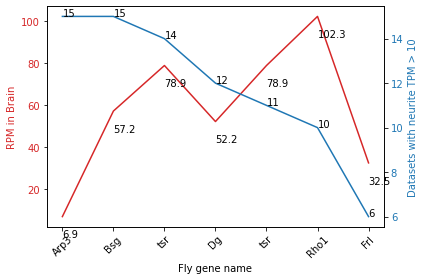

In [8]:
# plot: brain - RPM vs Number of datasets
x = np.arange(1, 1+len(df_brain), 1)
data1 = df_neur_brain_cm['rpm']
data2 = df_neur_brain_cm['Datasets with neurite TPM > 10']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Fly gene name')
ax1.set_ylabel('RPM in Brain', color=color)
ax1.plot(x, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x)
ax1.set_xticklabels(df_neur_brain_cm['Fly gene name'], rotation=45)
for a,b in zip(x, data1):
    ax1.annotate(text=str(b), xy=(a,b), xytext=(a,b-10))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Datasets with neurite TPM > 10', color=color)  # we already handled the x-label with ax1
ax2.plot(x, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
for a,b in zip(x, data2):
    ax2.annotate(text=str(b), xy=(a,b))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


# # plot: brain - RPM vs Mean TPM
# x = np.arange(1, 1+len(df_brain), 1)
# data1 = df_neur_brain_cm['rpm']
# data2 = df_neur_brain_cm['Mean TPM in neurites']

# fig, ax1 = plt.subplots()

# color = 'tab:red'
# ax1.set_xlabel('Gene name')
# ax1.set_ylabel('RPM in Brain', color=color)
# ax1.plot(x, data1, color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# ax1.set_xticks(x)
# ax1.set_xticklabels(df_neur_brain_cm['Gene name'], rotation=45)
# for a,b in zip(x, data1):
#     ax1.annotate(text=str(b), xy=(a,b), xytext=(a,b-10))

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('Mean TPM in neurites', color=color)  # we already handled the x-label with ax1
# ax2.plot(x, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# for a,b in zip(x, data2):
#     ax2.annotate(text=str(b), xy=(a,b))

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

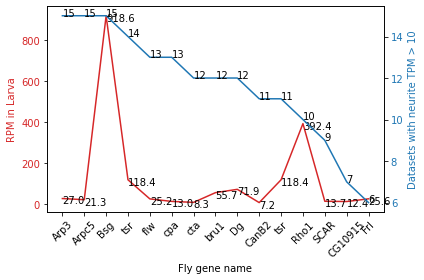

In [9]:
# plot: larva - RPM vs Number of datasets
x = np.arange(1, 1+len(df_larva), 1)
data1 = df_neur_larva_cm['rpm']
data2 = df_neur_larva_cm['Datasets with neurite TPM > 10']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Fly gene name')
ax1.set_ylabel('RPM in Larva', color=color)
ax1.plot(x, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x)
ax1.set_xticklabels(df_neur_larva_cm['Fly gene name'], rotation=45)
for a,b in zip(x, data1):
    ax1.annotate(text=str(b), xy=(a,b), xytext=(a,b-25))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Datasets with neurite TPM > 10', color=color)  # we already handled the x-label with ax1
ax2.plot(x, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
for a,b in zip(x, data2):
    ax2.annotate(text=str(b), xy=(a,b))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# # plot: larva - RPM vs Mean TPM
# x = np.arange(1, 1+len(df_larva), 1)
# data1 = df_neur_larva_cm['rpm']
# data2 = df_neur_larva_cm['Mean TPM in neurites']

# fig, ax1 = plt.subplots()

# color = 'tab:red'
# ax1.set_xlabel('Gene name')
# ax1.set_ylabel('RPM in Larva', color=color)
# ax1.plot(x, data1, color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# ax1.set_xticks(x)
# ax1.set_xticklabels(df_neur_larva_cm['Gene name'], rotation=45)
# for a,b in zip(x, data1):
#     ax1.annotate(text=str(b), xy=(a,b), xytext=(a,b-25))

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('Mean TPM in neurites', color=color)  # we already handled the x-label with ax1
# ax2.plot(x, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# for a,b in zip(x, data2):
#     ax2.annotate(text=str(b), xy=(a,b))

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

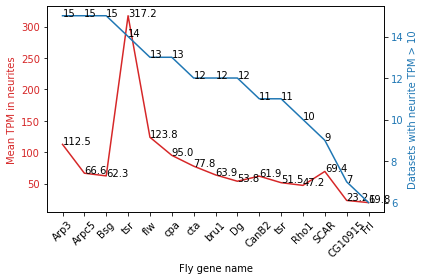

In [17]:
# plot: mean TPM in neurites vs num of datasets
x = np.arange(1, 1+len(df_neur_cm), 1)
data1 = df_neur_cm['Mean TPM in neurites']
data2 = df_neur_cm['Datasets with neurite TPM > 10']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Fly gene name')
ax1.set_ylabel('Mean TPM in neurites', color=color)
ax1.plot(x, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x)
ax1.set_xticklabels(df_neur_cm['Fly gene name'], rotation=45)
for a,b in zip(x, data1):
    ax1.annotate(text=str(b), xy=(a,b), xytext=(a,b))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Datasets with neurite TPM > 10', color=color)  # we already handled the x-label with ax1
ax2.plot(x, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
for a,b in zip(x, data2):
    ax2.annotate(text=str(b), xy=(a,b))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [107]:
# GO analysis on top 1000 neurite genes
GO_neur = gp.profile(organism='mmusculus', 
                      query=list_neur[:1001],
                      sources=['GO:BP', 'GO:MF', 'GO:CC'],
                      user_threshold=1e-10,
                      significance_threshold_method='bonferroni')
# print(GO_neur)
GO_neur.to_csv('GO_neur_1000.csv')

In [103]:
print(GO_neur.columns)

Index(['source', 'native', 'name', 'p_value', 'significant', 'description',
       'term_size', 'query_size', 'intersection_size', 'effective_domain_size',
       'precision', 'recall', 'query', 'parents'],
      dtype='object')


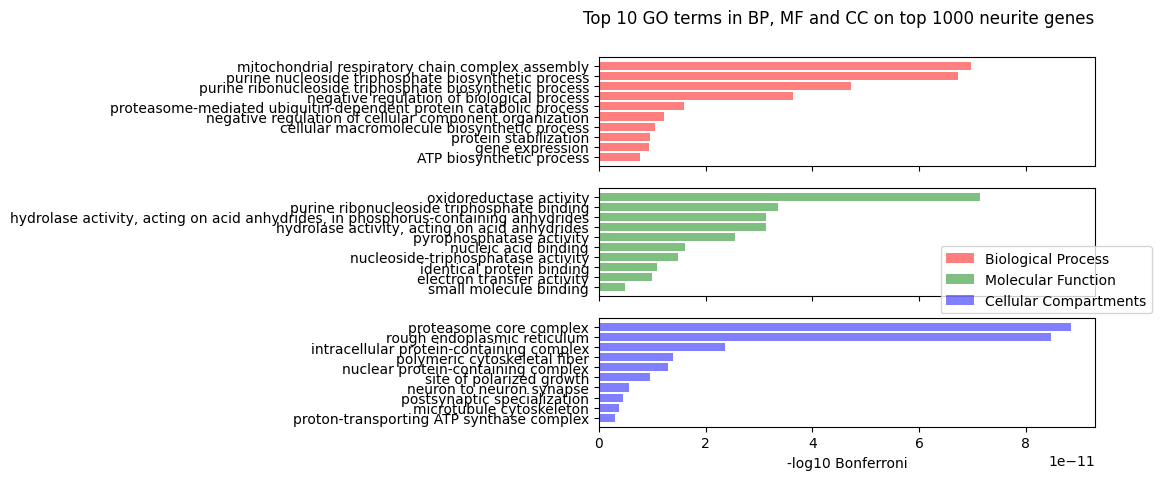

In [106]:
# GO analysis on biological process, molecular functions and cellualr compartments
GO_neur_BP = GO_neur[GO_neur['source']=='GO:BP']
GO_neur_BP = GO_neur_BP.sort_values(by='p_value', ascending=False)
GO_neur_MF = GO_neur[GO_neur['source']=='GO:MF']
GO_neur_MF = GO_neur_MF.sort_values(by='p_value', ascending=False)
GO_neur_CC = GO_neur[GO_neur['source']=='GO:CC']
GO_neur_CC = GO_neur_CC.sort_values(by='p_value', ascending=False)


# plot top 10 terms in BP and MF on top 1000 neurite genes
plt.rcdefaults()
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle('Top 10 GO terms in BP, MF and CC on top 1000 neurite genes')

#BP
y_pos = np.arange(10)
x1 = GO_neur_BP[:10]['p_value']

ax1.barh(y_pos, x1, align='center', color='r', alpha=0.5, label='Biological Process')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(GO_neur_BP[:10]['name'])
ax1.invert_yaxis()  # labels read top-to-bottom

#MF
y_pos = np.arange(10)
x2 = GO_neur_MF[:10]['p_value']

ax2.barh(y_pos, x2, align='center', color='g', alpha=0.5, label='Molecular Function')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(GO_neur_MF[:10]['name'])
ax2.invert_yaxis()  # labels read top-to-bottom

#CC
y_pos = np.arange(10)
x3 = GO_neur_CC[:10]['p_value']

ax3.barh(y_pos, x3, align='center', color='b', alpha=0.5, label='Cellular Compartments')
ax3.set_yticks(y_pos)
ax3.set_yticklabels(GO_neur_CC[:10]['name'])
ax3.invert_yaxis()  # labels read top-to-bottom
ax3.set_xlabel('-log10 Bonferroni')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(1.0, 0.5))

plt.show()


In [59]:
# find common genes in all 3 data
common_all = common_mam.intersection(list_syp_mam)
print(common_all)

{'CALM3', 'PPP3R1', 'CALM1', 'RAC1', 'ACTR3', 'MTPN', 'CTNND2', 'PPP1CB', 'MYL12B', 'ARPC5'}


In [60]:
# find gene names in drosophila
common_fly = []
for gene in common_all:
    common_fly.append((gene, conv[gene]))

print(common_fly)
# {'Cam', 'CanB2', 'Rac1', 'Rac2', 'Arp3', 'CG31715', 'p120ctn', 'flw', 'sqh', 'Arpc5'}
# [('CALM3', 'Cam'), ('PPP3R1', 'CanB2'), ('CALM1', 'Cam'), ('RAC1', ['Rac1', 'Rac2']), ('ACTR3', 'Arp3'), 
# ('MTPN', 'CG31715'), ('CTNND2', 'p120ctn'), ('PPP1CB', 'flw'), ('MYL12B', 'sqh'), ('ARPC5', 'Arpc5')]

[('CALM3', 'Cam'), ('PPP3R1', 'CanB2'), ('CALM1', 'Cam'), ('RAC1', ['Rac1', 'Rac2']), ('ACTR3', 'Arp3'), ('MTPN', 'CG31715'), ('CTNND2', 'p120ctn'), ('PPP1CB', 'flw'), ('MYL12B', 'sqh'), ('ARPC5', 'Arpc5')]


In [67]:
# Genes in both Jeff's iCLIP and rat iCLIP
common_ab = set_syp_rat.intersection(list_syp_mam)
common_ab_fly = []
for gene in common_ab:
    common_ab_fly.append((gene, conv[gene]))
print(common_ab_fly)
print(len(common_ab_fly))

[('CALM3', 'Cam'), ('PPP3R1', 'CanB2'), ('CALM1', 'Cam'), ('RAC1', ['Rac1', 'Rac2']), ('ACTR3', 'Arp3'), ('MTPN', 'CG31715'), ('CTNND2', 'p120ctn'), ('PPP1CB', 'flw'), ('MYL12B', 'sqh'), ('ARPC5', 'Arpc5')]
10
